# Predicting a Heart disease using Hybrid ML methods 

In [48]:
# Module Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
# Reading the cleveland dataset
cols = ['Age', 'Sex', 'CP', 'Trestbps', 'Cholestrol', 'Fbs', 'Restecg', 
        'Thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_cleveland = pd.read_csv("cleveland.csv", names=cols, header=None)
df_cleveland.head()
# Dataset has a dimesnion of 303 * 14 ( rows and columns) and below are the top 5 rows

,Age,Sex,CP,Trestbps,Cholestrol,Fbs,Restecg,Thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Features of the dataset
###### trestbps            : resting blood pressure (in mm Hg on admission to the hospital)
###### chol                  : serum cholestoral in mg/dl
###### cp                     : chest pain type  
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

###### fbs                  : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
###### restecg          : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
###### thalach           : maximum heart rate achieved
###### exang            : exercise induced angina (1 = yes; 0 = no)
###### OldPeak        :  ST depression induced by exercise relative to rest
###### num               : diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)


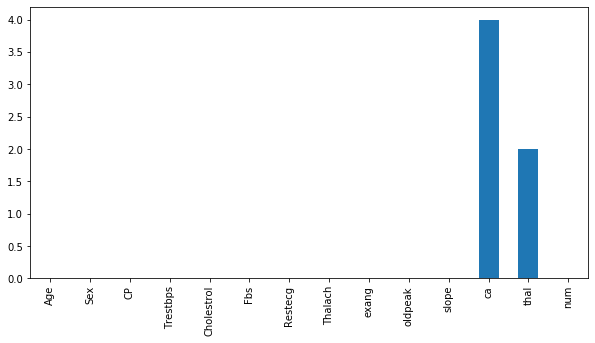

In [35]:
# bar representation of total count of NULL values in columns, if there are any
fig, ax1 = plt.subplots(1,1, figsize= (10, 5))
df_cleveland.isnull().sum().plot(kind="bar",ax=ax1)

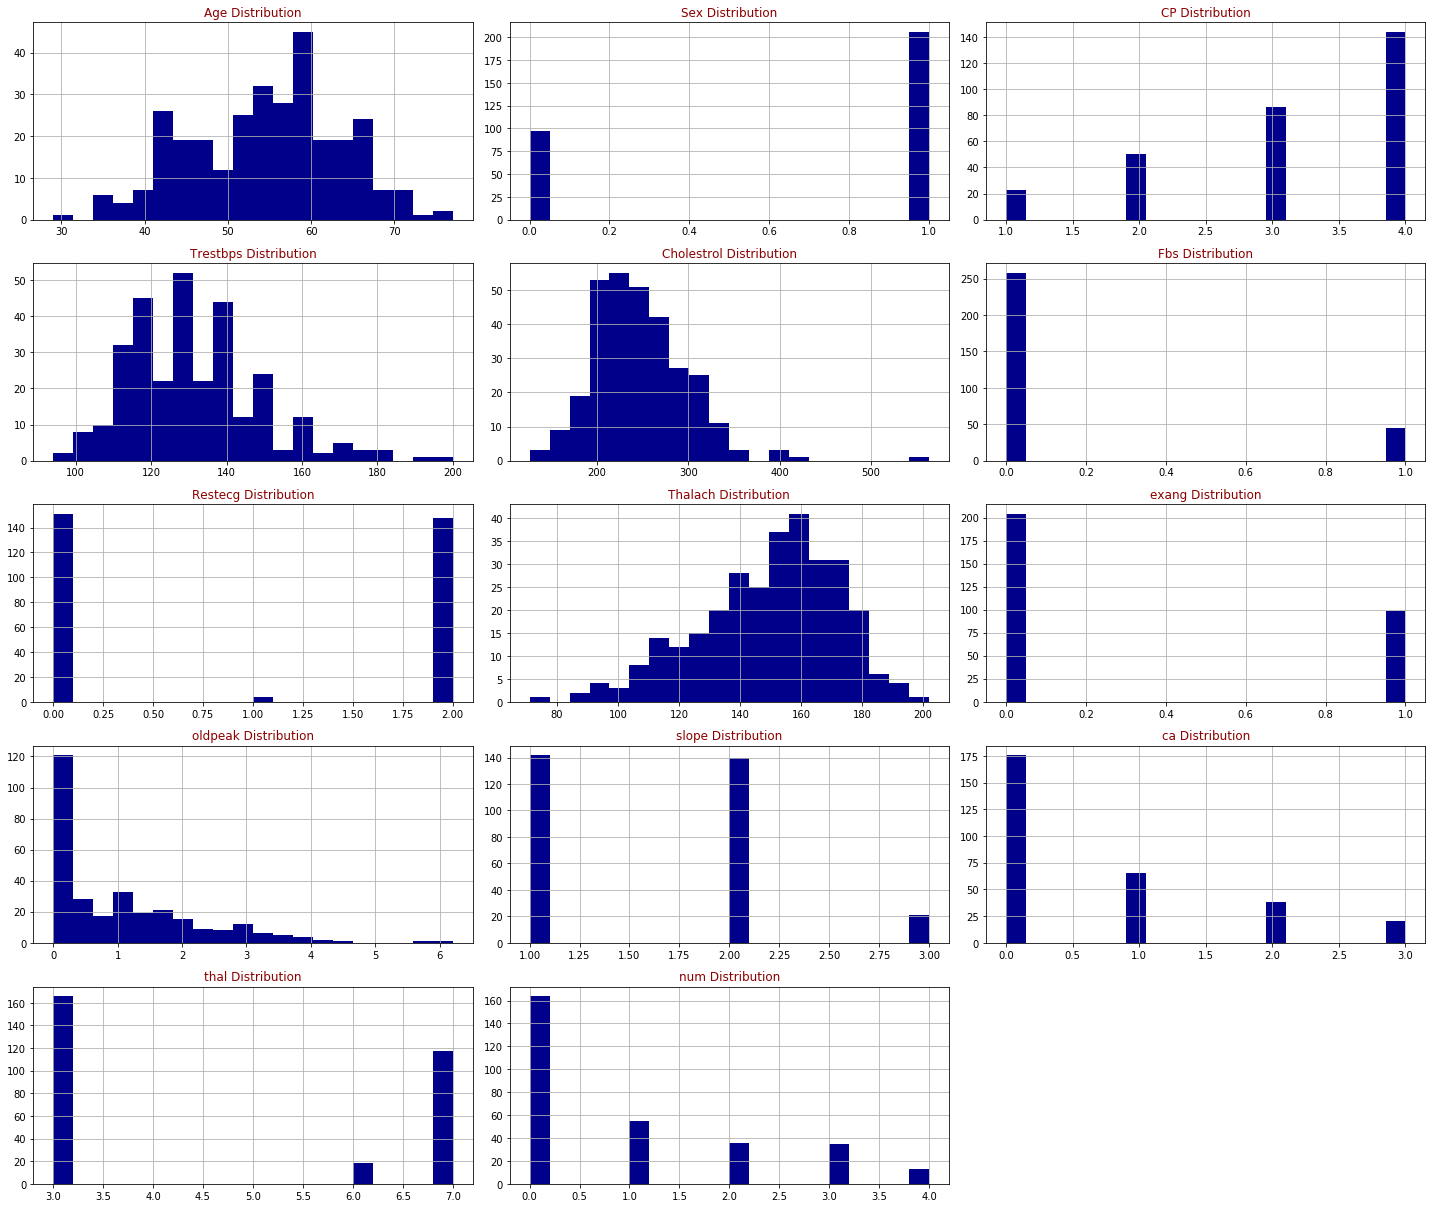

In [36]:
#exploring the dataset
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='darkblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(df_cleveland,df_cleveland.columns,6,3)

## Data Preprocessing
#### Data preprocessing involves multiclass variable and binary classification which is converting medical records into the numerical diagnosis values. As we are conisdering the processed cleveland dataset with numerical diagnosis values, we can skip that step

#### In below step, we are dropping the rows with null values

In [37]:
df_cleveland = df_cleveland.dropna(how="any")
# six rows are dropped as they have null values and now we have a data set of 297 * 14
df_cleveland.num.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: num, dtype: int64

#### In the above data  column "NUM" refers to the diagnosis of the patient. It varies from 0 to 5. 0 indicates the patient without a heart diesease and 1-5 indicates the patients with heart disease representing in different levels. Now we are setting the values of patients with disease to 1 

In [38]:
df_cleveland["num"].replace(dict.fromkeys([2,3,4,5], 1), inplace=True)
df_cleveland.num.value_counts()

# 297 patient records indicate that 137 records show the value of 1 establishing the presence of heart disease 
# while the remaining 160 refected the value of 0 indicating the absence of heart disease.

0    160
1    137
Name: num, dtype: int64

### Feature Scaling

##### As the base idea of the journal is using all the features in the algorithm training, we are not going and feature selection


In [39]:
# Splitting the dataset into the Training set and Test set
# 85 percent - Training , 15 percent for test
X = df_cleveland.iloc[:,:-1].values
y = df_cleveland.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [40]:
# Feature Extraction
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression


model_lr  =LogisticRegression()
model_lr.fit(X_train,y_train)
#Predict the test set results
y_lr_pred=model_lr.predict(X_test)
#checking the accuracy for predicted results
print("Confusion Matrix of Linear Regression:")
print(confusion_matrix(y_test, y_lr_pred))
print("Accuracy of Linear Regression :", accuracy_score(y_test,y_lr_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_lr_pred))
print(y_test)
print(y_lr_pred)

Confusion Matrix of Linear Regression:
[[21  1]
 [ 7 16]]
Accuracy of Linear Regression : 0.8222222222222222
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        22
           1       0.94      0.70      0.80        23

    accuracy                           0.82        45
   macro avg       0.85      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45

[0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0]
[0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 0]


## Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=30)
model_rf.fit(X_train,y_train)
y_rf_pred = model_rf.predict(X_test)

print("Confusion Matrix of Random Forest:")
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy of Random Forest :", accuracy_score(y_test,y_rf_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_rf_pred))
print(y_test)
print(y_rf_pred)

Confusion Matrix of Random Forest:
[[17  5]
 [ 6 17]]
Accuracy of Random Forest : 0.7555555555555555
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.77      0.74      0.76        23

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

[0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0]
[0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 0]


## SVM


In [14]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


model_svm = svm.SVC()
model_svm.fit(X_train,y_train)
y_svm_pred = model_svm.predict(X_test)

print("Confusion Matrix of SVM:")
print(confusion_matrix(y_test, y_svm_pred))
print("Accuracy of SVM :", accuracy_score(y_test,y_svm_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_svm_pred))
print(y_test)
print(y_svm_pred)

Confusion Matrix of SVM:
[[21  1]
 [ 7 16]]
Accuracy of SVM : 0.8222222222222222
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        22
           1       0.94      0.70      0.80        23

    accuracy                           0.82        45
   macro avg       0.85      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45

[0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0]
[0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 0]


## K - Neighbours

In [15]:
model_KNN = KNeighborsClassifier(n_neighbors = 8)

model_KNN.fit(X_train,y_train)
y_knn_pred = model_KNN.predict(X_test)

print("Confusion Matrix of K-Neighbours:")
print(confusion_matrix(y_test, y_knn_pred))
print("Accuracy of K-Neighbours :", accuracy_score(y_test,y_knn_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_knn_pred))
print(y_test)
print(y_knn_pred)

Confusion Matrix of K-Neighbours:
[[21  1]
 [ 8 15]]
Accuracy of K-Neighbours : 0.8
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.94      0.65      0.77        23

    accuracy                           0.80        45
   macro avg       0.83      0.80      0.80        45
weighted avg       0.83      0.80      0.80        45

[0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0]
[0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 0]


## Decision Tree

In [39]:

model_DT = DecisionTreeClassifier()

model_DT.fit(X_train,y_train)
y_dt_pred = model_DT.predict(X_test)

print("Confusion Matrix of K-Neighbours:")
print(confusion_matrix(y_test, y_dt_pred))
print("Accuracy of K-Neighbours :", accuracy_score(y_test,y_dt_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_dt_pred))
print(y_test)
print(y_dt_pred)

Confusion Matrix of K-Neighbours:
[[17  5]
 [ 9 14]]
Accuracy of K-Neighbours : 0.6888888888888889
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.65      0.77      0.71        22
           1       0.74      0.61      0.67        23

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.69        45
weighted avg       0.70      0.69      0.69        45

[0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0]
[0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 0 0]


In [37]:
res = pd.DataFrame({"Y_TEST":y_test, "Logistic Regression":y_lr_pred, "Random Forest":y_rf_pred, "SVM":y_svm_pred, "KNN": y_knn_pred})

In [38]:
scores = [y_lr_pred,y_svm_pred,y_knn_pred,score_knn,y_dt_pred,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

### Feature Selection


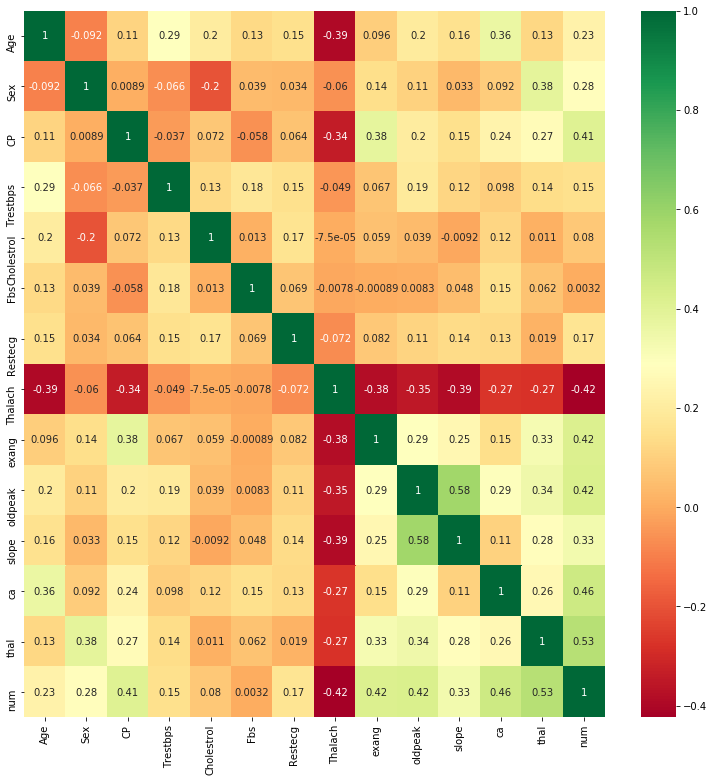

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df_cleveland.corr()
top_corr_features = correlation.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(df_cleveland[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Cp, thalach, exang, oldpeak, ca and thal were the highly correlated features with the target variable and we removed the less important features


In [43]:
target = df_cleveland['num']
df_cleveland =df_cleveland.drop(['Sex', 'Fbs', 'Restecg', 'slope', 'Cholestrol', 'Age', 'Trestbps', 'num'], axis=1)



Index(['CP', 'Thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')

In [45]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CP       297 non-null    int64  
 1   Thalach  297 non-null    int64  
 2   exang    297 non-null    int64  
 3   oldpeak  297 non-null    float64
 4   ca       297 non-null    float64
 5   thal     297 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 16.2 KB


In [47]:
i_train, i_test, j_train, j_test = train_test_split(df_cleveland, target, test_size=0.3, random_state=10)

In [78]:

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

In [53]:
# Random Forest

model_rf_2 = RandomForestClassifier(n_estimators=500)
model_rf_2.fit(i_train,j_train)
y_rf_pred_2 = model_rf_2.predict(i_test)

print("Confusion Matrix of Random Forest after FS:")
print(confusion_matrix(j_test, y_rf_pred_2))
print("Accuracy of Random Forest :", accuracy_score(j_test, y_rf_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_rf_pred_2))
print(j_test)
print(y_rf_pred_2)

Confusion Matrix of Random Forest after FS:
[[46 10]
 [ 8 26]]
Accuracy of Random Forest : 0.8
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        56
           1       0.72      0.76      0.74        34

    accuracy                           0.80        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0]


In [54]:
# Linear regression

model_lr_2  =LogisticRegression()
model_lr_2.fit(i_train,j_train)
#Predict the test set results
y_lr_pred_2=model_lr_2.predict(i_test)
#checking the accuracy for predicted results
print("Confusion Matrix of Linear Regression:")
print(confusion_matrix(j_test, y_lr_pred_2))
print("Accuracy of Linear Regression :", accuracy_score(j_test,y_lr_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_lr_pred_2))
print(j_test)
print(y_lr_pred_2)

Confusion Matrix of Linear Regression:
[[49  7]
 [ 6 28]]
Accuracy of Linear Regression : 0.8555555555555555
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.80      0.82      0.81        34

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0]


In [60]:
# KNN after feature selection
model_KNN_2 = KNeighborsClassifier()

model_KNN_2.fit(i_train, j_train)
y_knn_pred_2 = model_KNN_2.predict(i_test)

print("Confusion Matrix of K-Neighbours:")
print(confusion_matrix(j_test, y_knn_pred_2))
print("Accuracy of K-Neighbours :", accuracy_score(j_test,y_knn_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_knn_pred_2))
print(j_test)
print(y_knn_pred_2)

Confusion Matrix of K-Neighbours:
[[42 14]
 [ 7 27]]
Accuracy of K-Neighbours : 0.7666666666666667
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        56
           1       0.66      0.79      0.72        34

    accuracy                           0.77        90
   macro avg       0.76      0.77      0.76        90
weighted avg       0.78      0.77      0.77        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0]


In [80]:
# SVM after feature selection
pipeline_svm = make_pipeline(svm.SVC(probability=True, kernel='linear', class_weight='balanced'))
model_svm_2 = GridSearchCV(pipeline_svm,
 param_grid = {'svc__C': [0.01, 0.1, 1]}, 
 cv = kfolds,
 verbose=1, 
 n_jobs=-1)
model_svm_2.fit(i_train,j_train)
y_svm_pred_2 = model_svm_2.predict(i_test)

print("Confusion Matrix of SVM:")
print(confusion_matrix(j_test, y_svm_pred_2))
print("Accuracy of SVM :", accuracy_score(j_test,y_svm_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_svm_pred_2))
print(j_test)
print(y_svm_pred_2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   37.8s finished


Confusion Matrix of SVM:
[[50  6]
 [ 6 28]]
Accuracy of SVM : 0.8666666666666667
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.82      0.82      0.82        34

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0]


In [75]:
# DT after feature selection

model_DT_2 = DecisionTreeClassifier()

model_DT_2.fit(i_train,j_train)
y_dt_pred_2 = model_DT_2.predict(i_test)

print("Confusion Matrix of:")
print(confusion_matrix(j_test, y_dt_pred_2))
print("Accuracy  :", accuracy_score(j_test,y_dt_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_dt_pred_2))
print(j_test)
print(y_dt_pred_2)

Confusion Matrix of K-Neighbours:
[[39 17]
 [ 9 25]]
Accuracy of K-Neighbours : 0.7111111111111111
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        56
           1       0.60      0.74      0.66        34

    accuracy                           0.71        90
   macro avg       0.70      0.72      0.70        90
weighted avg       0.73      0.71      0.72        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0]


## Ensembling - Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier

estimators=[ ('lr', model_lr_2), ('svm', model_svm_2)]

majority_voting = VotingClassifier(estimators, voting='hard')
#fit model to training data
majority_voting.fit(i_train, j_train)

maj_pred = majority_voting.predict(i_test)
print("Confusion Matrix of Ensembler:")
print(confusion_matrix(j_test, maj_pred))
print("Accuracy of Ensemble :", accuracy_score(j_test, maj_pred))
print("Classifcation Report : ")
print(classification_report(j_test, maj_pred))
print(j_test)
print(maj_pred)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.2s finished


Confusion Matrix of Ensembler:
[[50  6]
 [ 6 28]]
Accuracy of Ensemble : 0.8666666666666667
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.82      0.82      0.82        34

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90

24     1
64     1
103    0
218    0
288    0
      ..
49     0
275    0
195    1
58     0
149    0
Name: num, Length: 90, dtype: int64
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0]


They are many other methods like ensemble - weighted averages, bagging & boosting 